In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Corrected alias from sys to sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the training data
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Importing test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
'''
Problem Statement ->
There is a XYZ Private Retail Company (Product based).

They have shared purchase summary of various customers
for selected high volume products for 1 month.

They want you to dig deep into the data and explore the trends and patterns.
'''

In [ ]:
print('Training data Shape: ',df_train.shape)
print('Testing data Shape: ',df_test.shape)

Training data Shape:  (550068, 12)
Testing data Shape:  (233599, 11)


In [ ]:
# The column numbers are not matching in training and testing data.

In [ ]:
# "Purchase" column in training data is the excess column.

In [ ]:
#Dropping Purchase column from training data
df_train = df_train.drop("Purchase", axis = 1)

In [ ]:
# Dropping the "Purchase" column from training data
print('Training data Shape: ',df_train.shape)
print('Testing data Shape: ',df_test.shape)

Training data Shape:  (550068, 11)
Testing data Shape:  (233599, 11)


In [ ]:
# Now the number of columns in training and testing data are same.

In [ ]:
# Concatenating the 2 datasets
df=pd.concat([df_train,df_test],axis=0,ignore_index=0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [ ]:
# Getting an idea about the duplicates in the data
df.duplicated().sum()

np.int64(0)

In [ ]:
# np.int64(0) means that there are no duplicates in the dataset.

In [ ]:
# Getting an idea about the final shape
print('Shape:',df.shape)
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Shape: (783667, 11)
Number of Rows: 783667
Number of Columns: 11


In [ ]:
# Getting an idea about the NULL values in the dataset
df.isnull().sum().any()

np.True_

In [ ]:
# np.True_ means that there are NULL values in the dataset.

In [ ]:
# Getting an idea where we have NULL values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982


In [ ]:
# Getting the unique values in "Product_Category_1"
print('Unique Value in Product_Catgory1:',df['Product_Category_1'].unique())

Unique Value in Product_Catgory1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


In [ ]:
'''
We can get the categories from 1 - 20
So, let's create a new category 21
'''

In [ ]:
# Imputing missing values in "Product_Category_2" and "Product_Category_3" with a new category 21
df['Product_Category_2']=df['Product_Category_2'].fillna(21)
df['Product_Category_3']=df['Product_Category_3'].fillna(21)

In [ ]:
# Getting an idea about NULL values
df.isnull().sum().any()

np.False_

In [ ]:
# np.False_ means that there are no NULL values in the dataset.

In [ ]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
# Getting an idea about the data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,21.0,21.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,21.0,21.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,21.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,21.0,21.0


In [ ]:
#Converting Product_Category_1 ,Product_Category_2 , Product_Category_3 into categorical columns
df['Product_Category_1']=df['Product_Category_1'].astype('category')
df['Product_Category_2']=df['Product_Category_2'].astype('category')
df['Product_Category_3']=df['Product_Category_3'].astype('category')
df['City_Category']=df['City_Category'].astype('category')
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     783667 non-null  int64   
 1   Product_ID                  783667 non-null  object  
 2   Gender                      783667 non-null  object  
 3   Age                         783667 non-null  object  
 4   Occupation                  783667 non-null  int64   
 5   City_Category               783667 non-null  category
 6   Stay_In_Current_City_Years  783667 non-null  category
 7   Marital_Status              783667 non-null  int64   
 8   Product_Category_1          783667 non-null  category
 9   Product_Category_2          783667 non-null  category
 10  Product_Category_3          783667 non-null  category
dtypes: category(5), int64(3), object(3)
memory usage: 45.6+ MB


In [ ]:
#Getting unique values in Gender column
print('Unique Value in Gender:',df['Gender'].unique())

Unique Value in Gender: ['F' 'M']


In [ ]:
# Converting "Gender" column to binary values
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,0,0-17,10,A,2,0,3,21.0,21.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,21.0,21.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,21.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,21.0,21.0


In [ ]:
# Question -> Get the unique values in "City_Category" and "Age" column
print('Unique Values in City_Category Column :\n', df['City_Category'].unique())
print('Unique Values in Age Column :\n', df['Age'].unique())

Unique Values in City_Category Column :
 ['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']
Unique Values in Age Column :
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [ ]:
df['City_Category'] = df['City_Category'].replace({'A': 0, 'B': 1, 'C': 2})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,0,0-17,10,0,2,0,3,21.0,21.0
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,14.0
2,1000001,P00087842,0,0-17,10,0,2,0,12,21.0,21.0
3,1000001,P00085442,0,0-17,10,0,2,0,12,14.0,21.0
4,1000002,P00285442,1,55+,16,2,4+,0,8,21.0,21.0


In [ ]:
# Data Visualization ->

In [ ]:
# Getting the columns
print('Columns :\n', df.columns)

Columns :
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


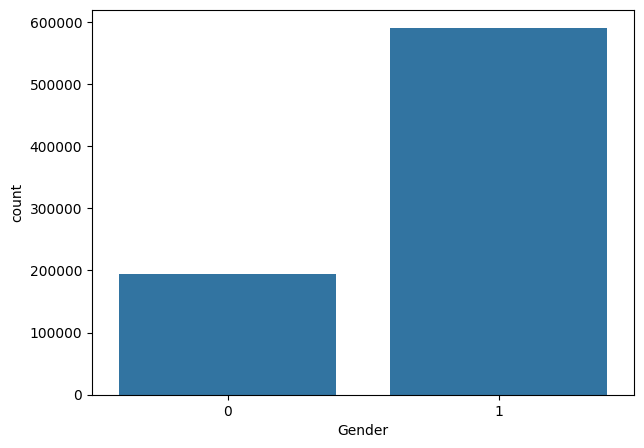

In [ ]:
#Countplots
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',data=df)
plt.show()

In [ ]:
# The number of male entries are significantly greater than female entries.

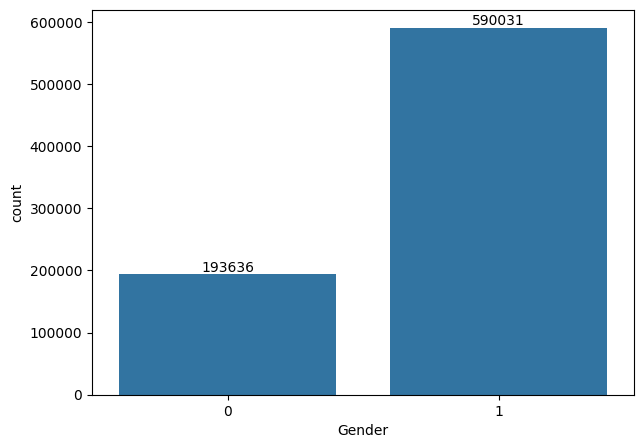

In [ ]:
# Countplot
plt.figure(figsize = (7, 5))
ax = sns.countplot(x = 'Gender', data = df)

for container in ax.containers:
  ax.bar_label(container)

plt.show()

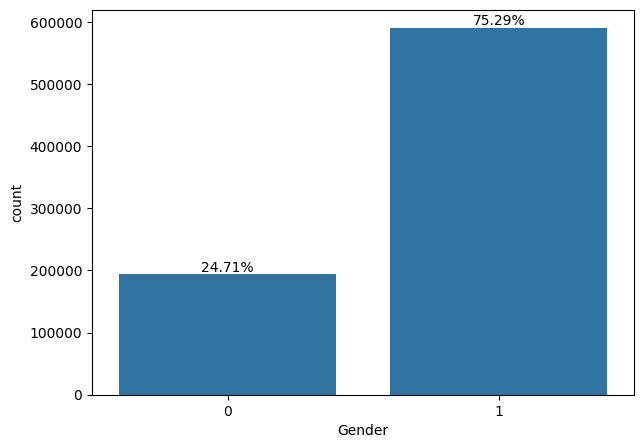

In [ ]:
# Countplot
plt.figure(figsize = (7, 5))
ax = sns.countplot(x = 'Gender', data = df)
total=len(df['Gender'])
for container in ax.containers:
  ax.bar_label(container,labels=[f'{(w.get_height()/total)*100:.2f}%' for w in container])

plt.show()

In [ ]:
'''
Conclusions: Majority of the customers are male.
'''

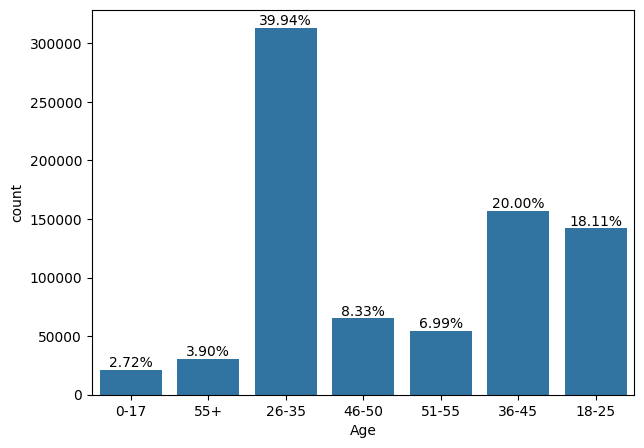

In [ ]:
# Countplot
plt.figure(figsize = (7, 5))
ax = sns.countplot(x = 'Age', data = df)
total=len(df['Age'])
for container in ax.containers:
  ax.bar_label(container,labels=[f'{(w.get_height()/total)*100:.2f}%' for w in container])

plt.show()

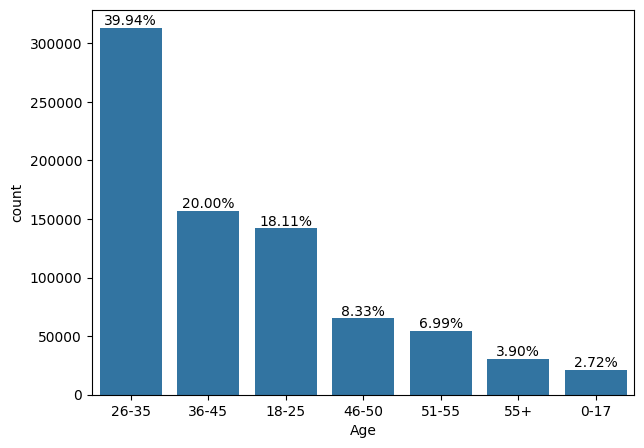

In [ ]:
# Countplot
plt.figure(figsize = (7, 5))
order=df['Age'].value_counts().index
ax = sns.countplot(x = 'Age', data = df,order=order)
total=len(df['Age'])
for container in ax.containers:
  ax.bar_label(container,labels=[f'{(w.get_height()/total)*100:.2f}%' for w in container])

plt.show()

In [ ]:
'''
Conclusions: Majority of the customers are in the prime working-age group (18–45 years), especially 26–35 years, and least are between 0-17 years old
'''

In [ ]:
# Getting an idea about the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     783667 non-null  int64   
 1   Product_ID                  783667 non-null  object  
 2   Gender                      783667 non-null  int64   
 3   Age                         783667 non-null  object  
 4   Occupation                  783667 non-null  int64   
 5   City_Category               783667 non-null  category
 6   Stay_In_Current_City_Years  783667 non-null  category
 7   Marital_Status              783667 non-null  int64   
 8   Product_Category_1          783667 non-null  category
 9   Product_Category_2          783667 non-null  category
 10  Product_Category_3          783667 non-null  category
dtypes: category(5), int64(4), object(2)
memory usage: 45.6+ MB


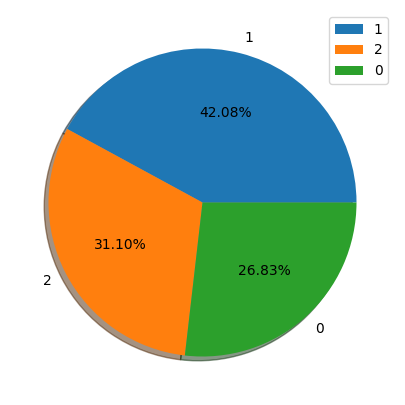

In [ ]:
# Question -> Draw a pie chart for 'City_Category'
city_values = df['City_Category'].value_counts()
plt.figure(figsize = (7, 5))
plt.pie(city_values, labels = city_values.index, autopct = '%.2f%%', shadow = True)
plt.legend()
plt.show()

In [ ]:
'''
Conclusions: Majority of the customers are from City_Category 1.
'''

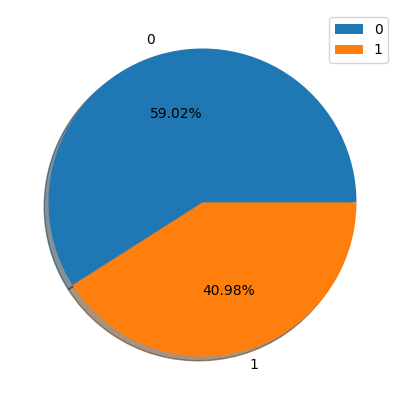

In [ ]:
# Question -> Draw a pie chart for 'Marital_Status'
marital_values = df['Marital_Status'].value_counts()
plt.figure(figsize = (7, 5))
plt.pie(marital_values, labels = marital_values.index, autopct = '%.2f%%', shadow = True)
plt.legend()
plt.show()


In [ ]:
'''
Conclusions: Majority of the customers are of marital status 0.
'''

In [ ]:
# Getting the columns
print(df.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


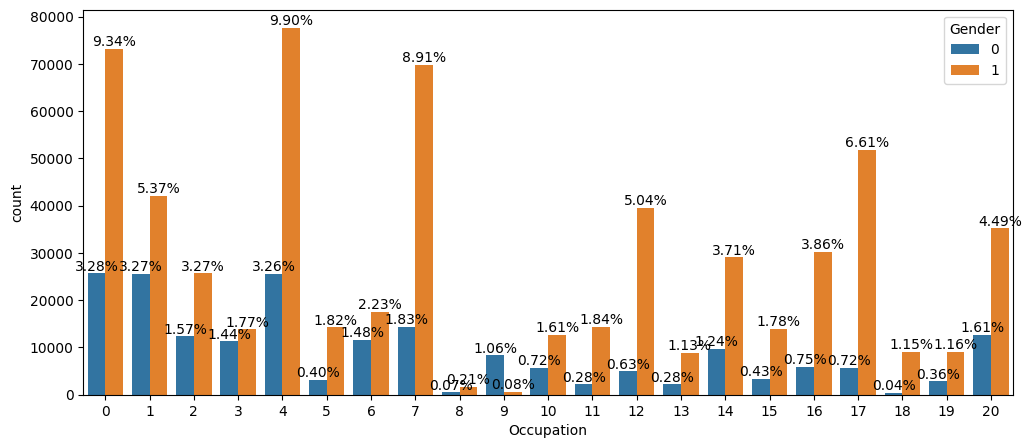

In [ ]:
# Question -> Draw countplot for Occupation by Gender
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'Occupation',hue='Gender', data = df)
total=len(df['Occupation'])

for container in ax.containers:
  ax.bar_label(container,labels=[f'{(w.get_height()/total)*100:.2f}%' for w in container])

plt.show()

In [ ]:
'''
Conclusions: Gender 1 leads across all occupations,
with the highest concentration in occupations 4, 7, and 0.
Occupations 8, 9, 10, and 18 are negligible.
'''

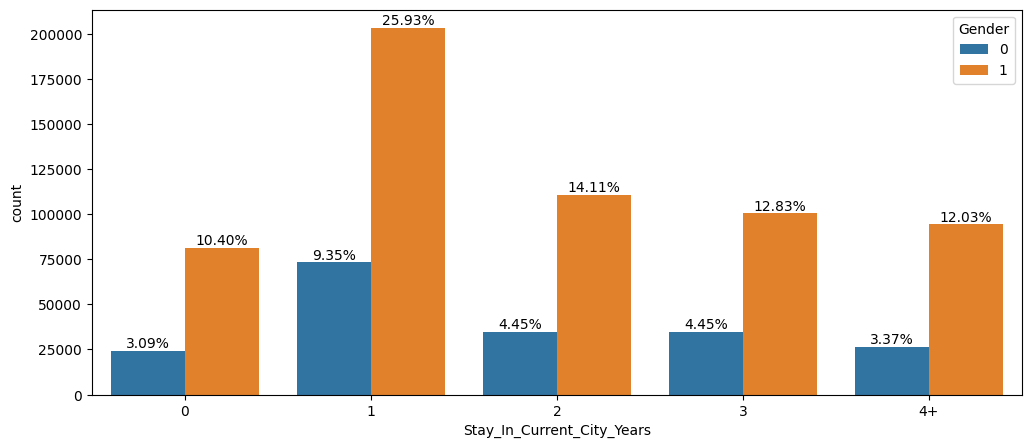

In [ ]:
# Question -> Draw countplot for Stay_In_Current_City_Years by Gender
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'Stay_In_Current_City_Years',hue='Gender', data = df)
total=len(df['Stay_In_Current_City_Years'])
for container in ax.containers:
  ax.bar_label(container,labels=[f'{(w.get_height()/total)*100:.2f}%' for w in container])

plt.show()

In [ ]:
'''
Conclusions: The majority of people have stayed in their city for 1 year. Gender 1 consistently outnumbers Gender 0
'''

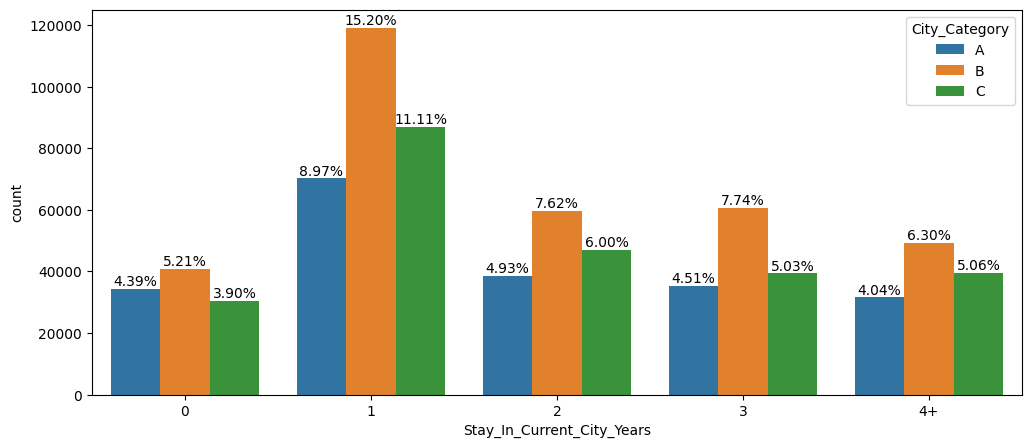

In [ ]:
# Question -> Draw countplot for Stay_In_Current_City_Years by City
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'Stay_In_Current_City_Years',hue='City_Category', data = df)
total=len(df['Stay_In_Current_City_Years'])
for container in ax.containers:
  ax.bar_label(container,labels=[f'{(w.get_height()/total)*100:.2f}%' for w in container])

plt.show()

In [ ]:
'''
Conclusions:
           Across all city categories (A, B, C), the 1-year stay dominates.
           City B attracts and retains the most people across all stay durations, especially at 1 year.
'''

In [ ]:
# Statistical Analysis
df.describe()

,User_ID,Gender,Occupation,Marital_Status
count,7.836670e+05,783667.00000,783667.000000,783667.000000
mean,1.003029e+06,0.75291,8.079300,0.409777
std,1.727267e+03,0.43132,6.522206,0.491793
min,1.000001e+06,0.00000,0.000000,0.000000
25%,1.001519e+06,1.00000,2.000000,0.000000
50%,1.003075e+06,1.00000,7.000000,0.000000
75%,1.004478e+06,1.00000,14.000000,1.000000
max,1.006040e+06,1.00000,20.000000,1.000000


In [ ]:
'''
All the above numerical columns -> 'User_ID', 'Gender', 'Occupation', 'Marital_Status'
represent a category, hence statistical analysis cannot be completed on them.
'''